In [2]:
import pandas as pd 

In [3]:
import seaborn as sns

In [39]:
%matplotlib inline

In [40]:
from scipy import stats

In [50]:
import scipy

In [51]:
from scipy.interpolate import griddata

In [41]:
import numpy as np

In [42]:
import matplotlib.pyplot as plt

In [ ]:
##Importing source Data


In [19]:
df = pd.read_csv("D:\data.csv")

In [20]:
print(df)

         year  month  tmax  tmin   af   rain    sun    station
0      1941.0    1.0   NaN   NaN  NaN   74.7    NaN  aberporth
1      1941.0    2.0   NaN   NaN  NaN   69.1    NaN  aberporth
2      1941.0    3.0   NaN   NaN  NaN   76.2    NaN  aberporth
3      1941.0    4.0   NaN   NaN  NaN   33.7    NaN  aberporth
4      1941.0    5.0   NaN   NaN  NaN   51.3    NaN  aberporth
...       ...    ...   ...   ...  ...    ...    ...        ...
37044  2020.0    2.0  10.8   4.5  2.0  117.4   63.1  yeovilton
37045  2020.0    3.0  11.5   3.0  6.0   43.4  159.2  yeovilton
37046  2020.0    4.0  17.5   5.3  3.0   39.8  235.0  yeovilton
37047  2020.0    5.0  19.7   6.8  2.0    3.6  305.6  yeovilton
37048  2020.0    6.0  20.5  11.0  0.0  103.0  187.6  yeovilton

[37049 rows x 8 columns]


In [21]:
df.describe()


,year,month,tmax,tmin,af,rain,sun
count,37029.000000,37029.000000,35430.000000,35507.000000,34080.000000,35551.000000,27546.000000
mean,1968.716276,6.487402,12.705699,5.926955,3.486385,73.421774,118.486343
std,36.936725,3.452393,5.024016,4.058164,5.194166,48.561530,63.367007
min,1853.000000,1.000000,-0.900000,-8.600000,0.000000,0.000000,2.800000
25%,1949.000000,3.000000,8.500000,2.700000,0.000000,39.400000,64.700000
50%,1976.000000,6.000000,12.400000,5.500000,1.000000,63.000000,111.900000
75%,1997.000000,9.000000,16.800000,9.400000,6.000000,95.600000,163.775000
max,2020.000000,12.000000,28.300000,17.000000,31.000000,568.800000,350.300000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37049 entries, 0 to 37048
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     37029 non-null  float64
 1   month    37029 non-null  float64
 2   tmax     35430 non-null  float64
 3   tmin     35507 non-null  float64
 4   af       34080 non-null  float64
 5   rain     35551 non-null  float64
 6   sun      27546 non-null  float64
 7   station  37049 non-null  object 
dtypes: float64(7), object(1)
memory usage: 2.3+ MB


In [ ]:
## Data preprocessing

In [ ]:
##create a new field for decade Column  by copying the year row Column

In [26]:
df['decade']=df.year.astype(str)

In [ ]:
##Delete the final digit Column and add 0s to the string

In [27]:
df['decade']=df.decade.str[:3]+'0s'

In [28]:
print(df)

         year  month  tmax  tmin   af   rain    sun    station decade
0      1941.0    1.0   NaN   NaN  NaN   74.7    NaN  aberporth  1940s
1      1941.0    2.0   NaN   NaN  NaN   69.1    NaN  aberporth  1940s
2      1941.0    3.0   NaN   NaN  NaN   76.2    NaN  aberporth  1940s
3      1941.0    4.0   NaN   NaN  NaN   33.7    NaN  aberporth  1940s
4      1941.0    5.0   NaN   NaN  NaN   51.3    NaN  aberporth  1940s
...       ...    ...   ...   ...  ...    ...    ...        ...    ...
37044  2020.0    2.0  10.8   4.5  2.0  117.4   63.1  yeovilton  2020s
37045  2020.0    3.0  11.5   3.0  6.0   43.4  159.2  yeovilton  2020s
37046  2020.0    4.0  17.5   5.3  3.0   39.8  235.0  yeovilton  2020s
37047  2020.0    5.0  19.7   6.8  2.0    3.6  305.6  yeovilton  2020s
37048  2020.0    6.0  20.5  11.0  0.0  103.0  187.6  yeovilton  2020s

[37049 rows x 9 columns]


In [ ]:
##Weather stationwise Display

In [29]:
print(df['station'].unique())

['aberporth' 'armagh' 'ballypatrick' 'bradford' 'braemar' 'camborne'
 'cambridge' 'cardiff' 'chivenor' 'cwmystwyth' 'dunstaffnage' 'durham'
 'eastbourne' 'eskdalemuir' 'heathrow' 'hurn' 'lerwick' 'leuchars'
 'lowestoft' 'manston' 'nairn' 'newtonrigg' 'oxford' 'paisley' 'ringway'
 'rossonwye' 'shawbury' 'sheffield' 'southampton' 'stornoway' 'tiree'
 'valley' 'waddington' 'whitby' 'wickairport' 'yeovilton']


In [ ]:
## create a new data set called heathrow_data where the station value is 'heathrow'

In [31]:
heathrow_data=df[df['station']=='heathrow'].copy()

In [32]:
print(heathrow_data)

         year  month  tmax  tmin   af  rain    sun   station decade
13237  1948.0    1.0   8.9   3.3  NaN  85.0    NaN  heathrow  1940s
13238  1948.0    2.0   7.9   2.2  NaN  26.0    NaN  heathrow  1940s
13239  1948.0    3.0  14.2   3.8  NaN  14.0    NaN  heathrow  1940s
13240  1948.0    4.0  15.4   5.1  NaN  35.0    NaN  heathrow  1940s
13241  1948.0    5.0  18.1   6.9  NaN  57.0    NaN  heathrow  1940s
...       ...    ...   ...   ...  ...   ...    ...       ...    ...
14102  2020.0    2.0  11.1   4.3  1.0  99.8   62.0  heathrow  2020s
14103  2020.0    3.0  12.0   3.9  1.0  42.8  148.0  heathrow  2020s
14104  2020.0    4.0  18.2   6.5  1.0  38.2  235.4  heathrow  2020s
14105  2020.0    5.0  21.1   9.1  0.0   2.0  308.6  heathrow  2020s
14106  2020.0    6.0  22.5  12.6  0.0  54.0  174.9  heathrow  2020s

[870 rows x 9 columns]


In [ ]:
## Exploratory Data Analysis

In [ ]:
## Exploring T  Min Value

In [33]:
heathrow_data['tmin'].describe()

count    870.000000
mean       7.082989
std        4.454639
min       -4.600000
25%        3.325000
50%        6.550000
75%       11.200000
max       16.700000
Name: tmin, dtype: float64

In [ ]:
## Exploring T  Max Value

In [34]:
heathrow_data['tmax'].describe()

count    870.000000
mean      14.919080
std        5.783048
min        0.800000
25%        9.800000
50%       14.700000
75%       20.100000
max       28.300000
Name: tmax, dtype: float64

In [ ]:
##  Display a boxplot for the tmax column using a catplot from Seaborn

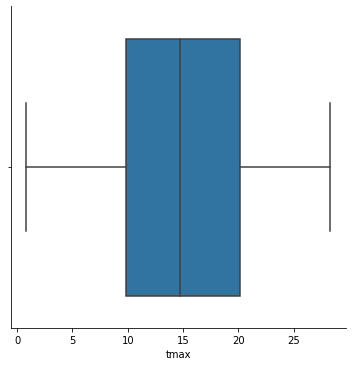

In [35]:
sns.catplot(kind='box', x='tmax', data=heathrow_data);

In [ ]:
##  Display a boxplot for the tmax column grouped by decade column

In [ ]:
## tmax is on the x-axis Co-ordinate while decade on the y-axis Co-ordinate& Thease two splits into different plots, the aspect value scales the width by a factor

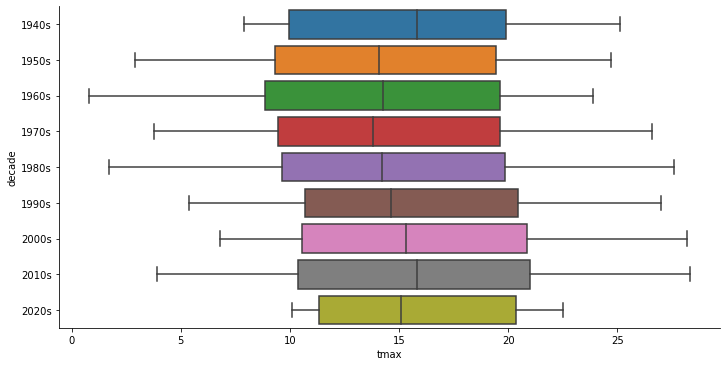

In [36]:
sns.catplot(kind='box', x='tmax', y='decade', data=heathrow_data, aspect=2);

In [ ]:
##  filter for the months where tmax>=20, group these by decade and count them

In [37]:
heathrow_data[heathrow_data['tmax'] >= 20].groupby('decade')['tmax'].count()

decade
1940s     6
1950s    25
1960s    28
1970s    29
1980s    30
1990s    33
2000s    37
2010s    36
2020s     2
Name: tmax, dtype: int64

In [ ]:
## This shows that the relative frequency of months where the mean of the maximum 
daily temperature exceeded 20°C went from approximately 20% in the 1950s to 30% in the 2010s.

In [49]:
df = pd.read_csv("D:\data.csv",df1 ='True', index_col=0)

TypeError: read_csv() got an unexpected keyword argument 'df1'

In [ ]:
##To Test Hypothetical values for time,rainfall,latitude & longitude

In [52]:
time = np.linspace (0,100,100)

In [53]:
rainfall = np.random.rand(100)

In [54]:
latitude = np.random.rand(100)

In [55]:
longitude = np.random.rand(100)

In [ ]:
## To plot the bar plot for rainfall values

Text(0.5, 0, 'time in minutes')

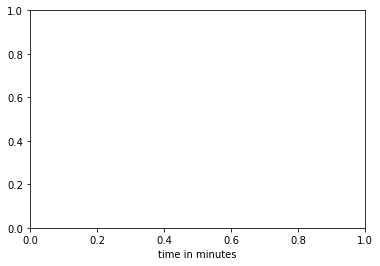

In [65]:
plt.xlabel('time in minutes')

Text(0, 0.5, 'Rainfall in mm')

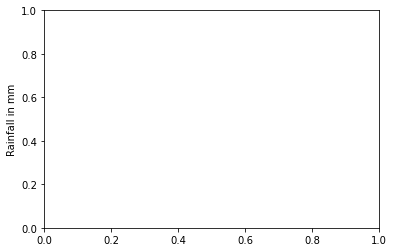

In [61]:
plt.ylabel('Rainfall in mm')

<BarContainer object of 100 artists>

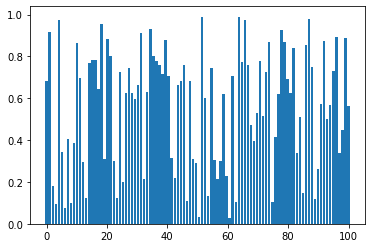

In [68]:
plt.bar(time,rainfall)

In [69]:
##To estimate the cumulative rainfall
cumulative_rainfall = np.cumsum(rainfall)

In [70]:
cumulative_rainfall

array([ 0.68292664,  1.5997135 ,  1.78085964,  1.87365682,  2.84654999,
        3.18912003,  3.26623576,  3.670611  ,  3.77005574,  4.15403534,
        5.02008829,  5.71873991,  6.01265124,  6.13482267,  6.90313167,
        7.68538991,  8.47043427,  9.11402721, 10.0712471 , 10.38122615,
       11.26451495, 12.06618431, 12.36841248, 12.49307419, 13.21825797,
       13.41978377, 14.0453332 , 14.79253453, 15.41602796, 16.01419061,
       16.67708169, 17.58862834, 17.80432617, 18.43390101, 19.36391235,
       20.16671894, 20.94361494, 21.70068813, 22.4173734 , 23.29658601,
       24.00259473, 24.31541661, 24.5335423 , 25.1966032 , 25.87892626,
       26.63803112, 26.74752895, 27.42961443, 27.73975783, 28.03228728,
       28.06473991, 29.05478878, 29.65599449, 29.78960125, 30.53538203,
       30.84162928, 31.05685869, 31.3547227 , 31.97304008, 32.19988875,
       32.22888772, 32.93655083, 33.03953637, 34.02700176, 34.80077836,
       35.77650172, 36.53600137, 37.00826178, 37.40182007, 37.93

In [71]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [72]:
plt.plot (cumulative,rainfall)

NameError: name 'cumulative' is not defined